#### For this project I plan to build and interpret two models. 
1. A model to predict Wine Quality score (a regression model).This model will interpret the effect of each feature on quality. For example say for every unit increase in residula sugar the quality goes up by X units, etc. 
2. A model to predict High Quality wines (those wines with quality >=7) vs Low quality (wines with quality < 7) (a classification model)

You can learn more about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

For this project I plan to focus on the following criteria:
    1. Clarity of my code 
    2. Clarity of my approach 
    3. Model tuning and model selection 
    4. Findings and data insights, i.e. clear interpretations. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
import random
from sklearn import feature_selection
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors

In [2]:
Data_White_Wine = pd.read_csv("winequality-white.csv", sep = ';', header = 1,names = ['fixed_acidity','volatile_acidity',
                                                       'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide',
                                                       'total_sulfur_dioxide','density','pH',
                                                       'sulphates','alcohol','quality'])
Data_White_Wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [3]:
Data_White_Wine.quality.unique()  # checking unique values for Y variable 

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

### Regression

In [5]:
Data_White_Wine.isnull().sum()   #checking null values 

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
Data_White_Wine.corr().round(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000,-0.023,0.289,0.089,0.023,-0.049,0.091,0.265,-0.426,-0.017,-0.121,-0.114
volatile_acidity,-0.023,1.000,-0.149,0.064,0.071,-0.097,0.089,0.027,-0.032,-0.036,0.068,-0.195
citric_acid,0.289,-0.149,1.000,0.094,0.114,0.094,0.121,0.149,-0.164,0.062,-0.076,-0.009
residual_sugar,0.089,0.064,0.094,1.000,0.089,0.299,0.401,0.839,-0.194,-0.026,-0.450,-0.098
chlorides,0.023,0.071,0.114,0.089,1.000,0.101,0.199,0.257,-0.090,0.017,-0.360,-0.210
free_sulfur_dioxide,-0.049,-0.097,0.094,0.299,0.101,1.000,0.615,0.294,-0.000,0.059,-0.250,0.008
total_sulfur_dioxide,0.091,0.089,0.121,0.401,0.199,0.615,1.000,0.530,0.003,0.135,-0.449,-0.175
density,0.265,0.027,0.149,0.839,0.257,0.294,0.530,1.000,-0.093,0.075,-0.780,-0.307
pH,-0.426,-0.032,-0.164,-0.194,-0.090,-0.000,0.003,-0.093,1.000,0.156,0.121,0.099
sulphates,-0.017,-0.036,0.062,-0.026,0.017,0.059,0.135,0.075,0.156,1.000,-0.018,0.054


Quality has a high positive correlation with Alcohol (0.436)

Quality has a high negative correlation with Density (-0.307)

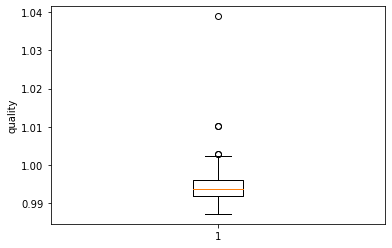

In [7]:
# checking for Outliers in Alcohol & Density

plt.boxplot(Data_White_Wine['density']) 
plt.ylabel("quality")
plt.show()

###  outliers in density found 

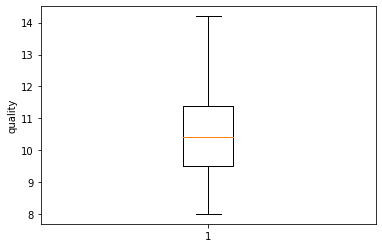

In [9]:
plt.boxplot(Data_White_Wine['alcohol']) 
plt.ylabel("quality")
plt.show()

### No outliers for Alcohol 

In [11]:
#Checking for outliers
len(Data_White_Wine)

4897

In [12]:
#for density
Density_Q1 = Data_White_Wine.density.quantile(0.25)
Density_Q3 = Data_White_Wine.density.quantile(0.75)
IQR_Density = Density_Q3 - Density_Q1
print(IQR_Density)

0.0043799999999999395


In [13]:
# dropping Outliers for Density 
Data_White_Wine.drop(Data_White_Wine[Data_White_Wine['density'] > (Density_Q3 + 1.5*IQR_Density)].index, inplace = True)

In [14]:
len(Data_White_Wine)
# 5 outliers removed 

4892

In [15]:
listOfAllVariables = Data_White_Wine.columns.values
print(listOfAllVariables)
X = Data_White_Wine[listOfAllVariables]
del X['quality']
y = Data_White_Wine['quality']

['fixed_acidity' 'volatile_acidity' 'citric_acid' 'residual_sugar'
 'chlorides' 'free_sulfur_dioxide' 'total_sulfur_dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


In [16]:
lm = LinearRegression()
lm = smf.ols(formula='y ~ X', data=Data_White_Wine).fit()
print(lm.summary())
print(lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     178.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:36:18   Log-Likelihood:                -5524.5
No. Observations:                4892   AIC:                         1.107e+04
Df Residuals:                    4880   BIC:                         1.115e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    226.7054     23.378      9.697      0.0

Looking at the pvalues : 
Fixed acidity,volatile acidity,residual sugar,free_sulfur_dioxide,density,pH,sulphates and alcohol are significant

&

citric acid ,chlorides , total sulphur dioxide anre not significant to the model as they have high p-value more than 0.05% significance level


In [17]:
#Standardizing the dataset 

from sklearn import preprocessing
Data_White_Winenew = preprocessing.scale(Data_White_Wine) 
Data_White_Winenew= pd.DataFrame(Data_White_Winenew)   
Data_White_Winenew.columns = Data_White_Wine.columns.values  
Data_White_Wine = Data_White_Winenew

In [18]:
listOfAllVariables = Data_White_Wine.columns.values
print(listOfAllVariables)
X = Data_White_Wine[listOfAllVariables]
del X['quality']
y = Data_White_Wine['quality']
X

['fixed_acidity' 'volatile_acidity' 'citric_acid' 'residual_sugar'
 'chlorides' 'free_sulfur_dioxide' 'total_sulfur_dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.656647,0.219230,0.048126,-0.959895,0.147815,-1.253102,-0.149173,-0.002231,0.739514,0.000985,-0.824969
1,1.476248,0.019830,0.543947,0.109344,0.193575,-0.312476,-0.972545,0.377522,0.474617,-0.437164,-0.337322
2,0.409801,-0.478670,-0.117148,0.432133,0.559660,0.686939,1.121172,0.550137,0.011046,-0.787683,-0.499871
3,0.409801,-0.478670,-0.117148,0.432133,0.559660,0.686939,1.121172,0.550137,0.011046,-0.787683,-0.499871
4,1.476248,0.019830,0.543947,0.109344,0.193575,-0.312476,-0.972545,0.377522,0.474617,-0.437164,-0.337322
...,...,...,...,...,...,...,...,...,...,...,...
4887,-0.775142,-0.678069,-0.365058,-0.959895,-0.309791,-0.665211,-1.090169,-0.989588,0.540841,0.088615,0.556697
4888,-0.301165,0.418630,0.213400,0.331262,0.056293,1.274830,0.697724,0.308476,-0.253851,-0.261904,-0.743694
4889,-0.419659,-0.378970,-1.191426,-1.040592,-0.218270,-0.312476,-0.643196,-0.506266,-1.313440,-0.261904,-0.906243
4890,-1.604601,0.119530,-0.282421,-1.060766,-1.087721,-0.900368,-0.666721,-1.835401,1.004411,-0.962942,1.857088


In [19]:
y

0       0.137956
1       0.137956
2       0.137956
3       0.137956
4       0.137956
          ...   
4887    0.137956
4888   -0.990609
4889    0.137956
4890    1.266522
4891    0.137956
Name: quality, Length: 4892, dtype: float64

In [20]:
#running Lasso Regression on the standardized model 
#this was a lasso regression with default values
lm_lasso = linear_model.Lasso().fit(X,y)
lm_lasso.coef_

array([-0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0.,  0.])

(array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]), [0.7277461331641593, 0.727746132964255, 0.7277461309644271, 0.7277461109779131, 0.7277459111281023, 0.7277439244940096, 0.7277245358750568, 0.72762379167929, 0.7324962580583131, 0.783817154309403, 1.0040840991391715, 1.0040840991391715, 1.0040840991391715, 1.0040840991391715, 1.0040840991391715, 1.0040840991391715, 1.0040840991391715, 1.0040840991391715, 1.0040840991391715, 1.0040840991391715, 1.0040840991391715])


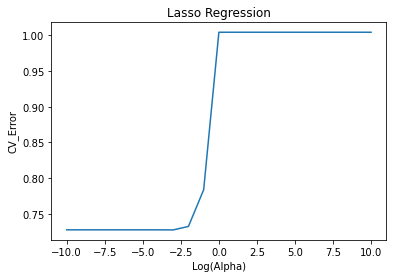

In [21]:
MSE_Lasso_CV = []
alphas = np.logspace(-10, 10, 21)
alphas_index = np.linspace(-10, 10, 21)

CV_Scores = []

for a in alphas:
    lm1 = linear_model.Lasso(alpha=a)
    CV_Scores.append(- cross_val_score(lm1, X, y, cv=10, 
                     scoring = 'neg_mean_squared_error').mean())



print((alphas, CV_Scores))

plt.plot(alphas_index, CV_Scores)
plt.xlabel("Log(Alpha)")
plt.ylabel("CV_Error")
plt.title("Lasso Regression")
plt.show()

In [22]:
#MSE is flat up to log_alpha = -2. Log_alpha results in alpha = 0.01 (due to its logarithmic scale)
lm2 = linear_model.Lasso(alpha=0.01)
lm2.fit(X, y)
print(lm2.coef_,X.columns)

[-0.         -0.21153608  0.          0.2759089  -0.01262707  0.06102763
 -0.         -0.25730324  0.05807502  0.05706346  0.3645818 ] Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


 Based on Lasso regression outputs, we decide to eliminate fixed acidity, citric acid, total sulfur dioxide,from our model. The coefficients that made it to our final models were volatile acidity,residual sugar,chlorides,free sulfur dioxide, density, pH,sulphates,alcohol.

In [23]:
#reloading the data set to run the linear regression on non Standardazized Dataset 
# but now removing thoses variable as specified by Lasso 
Wine = pd.read_csv("winequality-white.csv", sep = ';', header = 1,names = ['fixed_acidity','volatile_acidity',
                                                       'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide',
                                                       'total_sulfur_dioxide','density','pH',
                                                       'sulphates','alcohol','quality'])
Wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [24]:
X1= Wine[['volatile_acidity','residual_sugar','chlorides','free_sulfur_dioxide','density','pH',
         'sulphates','alcohol']]

In [25]:
y1 = Wine.quality

In [26]:
linreg_1 = LinearRegression()
linreg_1.fit(X1,y1)     #Fit

LinearRegression()

In [27]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='y1 ~ X1', data=Wine).fit()
print(lm.summary())
print(lm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     238.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:36:22   Log-Likelihood:                -5548.4
No. Observations:                4897   AIC:                         1.111e+04
Df Residuals:                    4888   BIC:                         1.117e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    110.1009     12.776      8.618      0.0

In [29]:
print((linreg_1.intercept_).round(3))
print((linreg_1.coef_).round(3))

110.101
[-1.92800e+00  6.60000e-02 -5.19000e-01  3.00000e-03 -1.09122e+02
  4.56000e-01  5.71000e-01  2.42000e-01]


Equation for Linear Reggresion :

Quality (Y) = 110.101 -1.92800e+00 * volatile_acidity + 6.60000e-02residual_sugar -5.19000e-01 * chlorides +3.00000e-03 *free_sulfur_dioxide -1.09122e+02 *density + 4.56000e-01 *pH + 5.71000e-01 * sulphates + 2.42000e-01*alcohol

#So after removing variable(as suggested by Lasso) we get all pvalue as significant .
So our final model for predicting Quality will have following variable : 'volatile_acidity', 'residual_sugar','chlorides', 'free_sulfur_dioxide', 'density','pH', 'sulphates', 'alcohol']

with everything being constant :

*On average ,If we increase alcohol amount by 1 unit under study, then the quality of wine would increase by 0.2415

*On average ,If we increase ph amount by 1 unit under study, then the quality of wine would increase by 0.4555

*On average ,If we increase residual sugar amount by 1 unit under study, then the quality of wine would increase by 0.0656 

*On average ,If we increase density by 1 unit under study, then the quality of wine would decrease by -109.1225

So , Density can have very negative effect on the quality of wine .

### Using KNN for Regression

In [30]:
White_Wine = pd.read_csv("winequality-white.csv", sep = ';', header = 1,names = ['fixed_acidity','volatile_acidity',
                                                       'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide',
                                                       'total_sulfur_dioxide','density','pH',
                                                       'sulphates','alcohol','quality'])
White_Wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [39]:
Wine1 = pd.read_csv("winequality-white.csv", sep = ';', header = 1,names = ['fixed_acidity','volatile_acidity',
                                                       'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide',
                                                       'total_sulfur_dioxide','density','pH',
                                                       'sulphates','alcohol','quality'])
Wine1.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [38]:
#Standardizing the dataset to run KNN regression 

from sklearn import preprocessing
White_Winenew = preprocessing.scale(White_Wine) 
White_Winenew= pd.DataFrame(White_Winenew)   
White_Winenew.columns = White_Wine.columns.values  
White_Wine = White_Winenew

In [40]:
listOfAllVariable = White_Wine.columns.values
print(listOfAllVariable)
X_var = White_Wine[listOfAllVariable]
del X_var['quality']
y = Wine1['quality']  
X_var

['fixed_acidity' 'volatile_acidity' 'citric_acid' 'residual_sugar'
 'chlorides' 'free_sulfur_dioxide' 'total_sulfur_dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.657401,0.215857,0.048040,-0.944861,0.147725,-1.252816,-0.149526,-0.008682,0.739816,0.001270,-0.824639
1,1.475640,0.017433,0.543829,0.100930,0.193496,-0.312003,-0.973139,0.359304,0.474874,-0.436848,-0.336984
2,0.409120,-0.478625,-0.117223,0.416641,0.559662,0.687610,1.121192,0.526570,0.011226,-0.787343,-0.499536
3,0.409120,-0.478625,-0.117223,0.416641,0.559662,0.687610,1.121192,0.526570,0.011226,-0.787343,-0.499536
4,1.475640,0.017433,0.543829,0.100930,0.193496,-0.312003,-0.973139,0.359304,0.474874,-0.436848,-0.336984
...,...,...,...,...,...,...,...,...,...,...,...
4892,-0.775903,-0.677049,-0.365117,-0.944861,-0.309984,-0.664808,-1.090798,-0.965445,0.541110,0.088894,0.557051
4893,-0.301894,0.414281,0.213303,0.317981,0.056183,1.275618,0.697620,0.292397,-0.253715,-0.261601,-0.743364
4894,-0.420396,-0.379414,-1.191432,-1.023789,-0.218442,-0.312003,-0.643694,-0.497099,-1.313482,-0.261601,-0.905915
4895,-1.605419,0.116645,-0.282486,-1.043521,-1.088088,-0.900011,-0.667226,-1.785049,1.004758,-0.962590,1.857466


In [41]:
y

0       6
1       6
2       6
3       6
4       6
       ..
4892    6
4893    5
4894    6
4895    7
4896    6
Name: quality, Length: 4897, dtype: int64

In [42]:
from sklearn import neighbors, metrics
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_var,y)
Score = knn.score(X_var, y)

MissClassificationError = 1 - Score
print(MissClassificationError)  #our misclassification error is 28.42% which is decent 

0.28425566673473557


C:\Users\jsaum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jsaum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jsaum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jsaum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jsaum\anaconda3\lib\site-packag

C:\Users\jsaum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jsaum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jsaum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jsaum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jsaum\anaconda3\lib\site-packag

C:\Users\jsaum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jsaum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jsaum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jsaum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jsaum\anaconda3\lib\site-packag

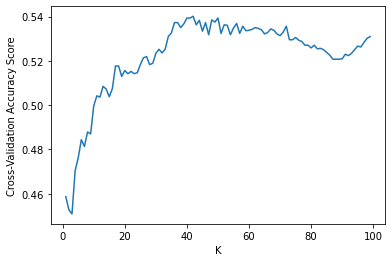

The best K is 42.000000


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score

CV_Scores = []
RangeOfK = range(1,100)

for k in RangeOfK:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, weights= 'uniform')
    CV_Scores.append(cross_val_score(knn, X_var, y, cv=10, scoring = 'accuracy').mean())    

plt.plot(RangeOfK, CV_Scores)
plt.xlabel("K")
plt.ylabel("Cross-Validation Accuracy Score")
plt.show()

print("The best K is %f" %RangeOfK[np.argmax(CV_Scores)])

It seems like k = 42 produces the best result with CV error close to 46%. This error is more than what we found before but is more reliable since it's CV error. 

# Section 2 - Classification

In [31]:
# add as many boxes as you want - you have only learned KNN as a classification algorithm

In [32]:
# add as many boxes as you want
Data_Wine = pd.read_csv("winequality-white.csv", sep = ';', header = 1,names = ['fixed_acidity','volatile_acidity',
                                                       'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide',
                                                       'total_sulfur_dioxide','density','pH',
                                                       'sulphates','alcohol','quality'])
Data_Wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [33]:
#Creating Dummy variables for Quality
HQ = Data_Wine['quality'] >=7 
LQ = Data_Wine['quality'] <7
Data_Wine.loc[HQ,'Quality_div'] = 'HQ'
Data_Wine.loc[LQ,'Quality_div'] = 'LQ'
QualityDummy = pd.get_dummies(Data_Wine.Quality_div, prefix = 'Quality')

Data_Wine1 = pd.concat([Data_Wine,QualityDummy], axis=1)
del Data_Wine1['Quality_LQ']

Data_Wine1.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Quality_div,Quality_HQ
0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,LQ,0
1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,LQ,0
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,LQ,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,LQ,0
4,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,LQ,0


In [34]:
#standardizing the Dataset

def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X - X_Min)/(X_Max - X_Min)
    return X_Standardized
NameOfVariables = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for i in NameOfVariables:
    Data_Wine1[i] = Standardize(Data_Wine1[i])
    
X = Data_Wine1[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
1,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
2,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
...,...,...,...,...,...,...,...,...,...,...,...
4892,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129
4893,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065
4894,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806
4895,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194


In [35]:
#Using knn

y = Data_Wine1['Quality_HQ']

from sklearn import neighbors, metrics
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X,y)
Score = knn.score(X, y)

MissClassificationError = 1 - Score
print(MissClassificationError)  #our misclassification Error is 10% which is good 

0.10700428833979991


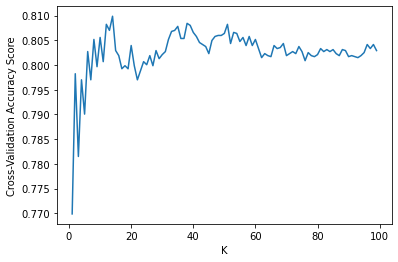

The best K is 14.000000


In [36]:
CV_Scores = []
RangeOfK = range(1,100)

for k in RangeOfK:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, weights= 'uniform')
    CV_Scores.append(cross_val_score(knn, X, y, cv=10, scoring = 'accuracy').mean())    

plt.plot(RangeOfK, CV_Scores)
plt.xlabel("K")
plt.ylabel("Cross-Validation Accuracy Score")
plt.show()

print("The best K is %f" %RangeOfK[np.argmax(CV_Scores)])

It seems like k = 14 produces the best result with CV error close to 19%. This error is more than what we found before but is more reliable since it's CV error. 

In [37]:
knn = neighbors.KNeighborsRegressor(n_neighbors=14, weights='uniform')
knn.fit(X,y)
knn.predict(X)

array([0.        , 0.07142857, 0.        , ..., 0.        , 0.64285714,
       0.14285714])

In [46]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 14, weights='uniform')
knn.fit(X,y)
x1 = Data_Wine1[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y_hat = knn.predict(x1)
print(y_hat)

[6 6 6 ... 5 7 6]
